In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
df_test2=df_test.copy()


In [4]:
df_train.set_index('Id' , inplace=True)
df_test.set_index('Id' , inplace=True)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [7]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
y=df_train.pop('SalePrice')

In [9]:
nancol=df_train.isna().sum().sort_values(ascending = False) [1:20]

In [10]:
df_train.isnull().sum().sort_values(ascending = False) [1:20]

MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
LotConfig          0
dtype: int64

In [11]:
nancol.index

Index(['MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrArea', 'MasVnrType', 'Electrical', 'LotConfig'],
      dtype='object')

In [12]:
dropcol=[]
for i in nancol.index:
    if nancol.loc[i]/len(df_train) >0.4:
        dropcol.append(i)

In [13]:
dropcol

['MiscFeature', 'Alley', 'Fence', 'FireplaceQu']

In [14]:
dropcol.append('PoolQC')

In [15]:
dropcol

['MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'PoolQC']

In [16]:
df_train.drop(dropcol , axis= 1 , inplace= True)
df_test.drop(dropcol , axis= 1 , inplace= True)

In [18]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal


In [19]:
num_col=df_train._get_numeric_data().columns

In [20]:
cat_col=list(set(df_train) -set(num_col))

# Taking care of missing data

In [25]:
from sklearn.impute import SimpleImputer
si_float=SimpleImputer(missing_values=np.nan , strategy='mean')
si_float2=SimpleImputer(missing_values=np.nan , strategy='mean')

In [26]:
df_train[num_col]=si_float.fit_transform(df_train[num_col])
df_test[num_col]=si_float2.fit_transform(df_test[num_col])

In [27]:
si_cat=SimpleImputer(missing_values=np.nan , strategy='most_frequent')
df_train[cat_col]=si_cat.fit_transform(df_train[cat_col])
si_cat2=SimpleImputer(missing_values=np.nan , strategy='most_frequent')
df_test[cat_col]=si_cat2.fit_transform(df_test[cat_col])

In [28]:
df_train.isnull().sum().sort_values(ascending=False)[1:20]

YearRemodAdd    0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
RoofStyle       0
YearBuilt       0
SaleType        0
dtype: int64

In [29]:
ordinal_columns = ['Street','LotShape','LandContour','Utilities','LandSlope','BldgType','HouseStyle','ExterQual','ExterCond','BsmtQual','BsmtCond',
                   'BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','KitchenQual','Functional','GarageFinish','GarageQual','GarageCond',
                   'PavedDrive']

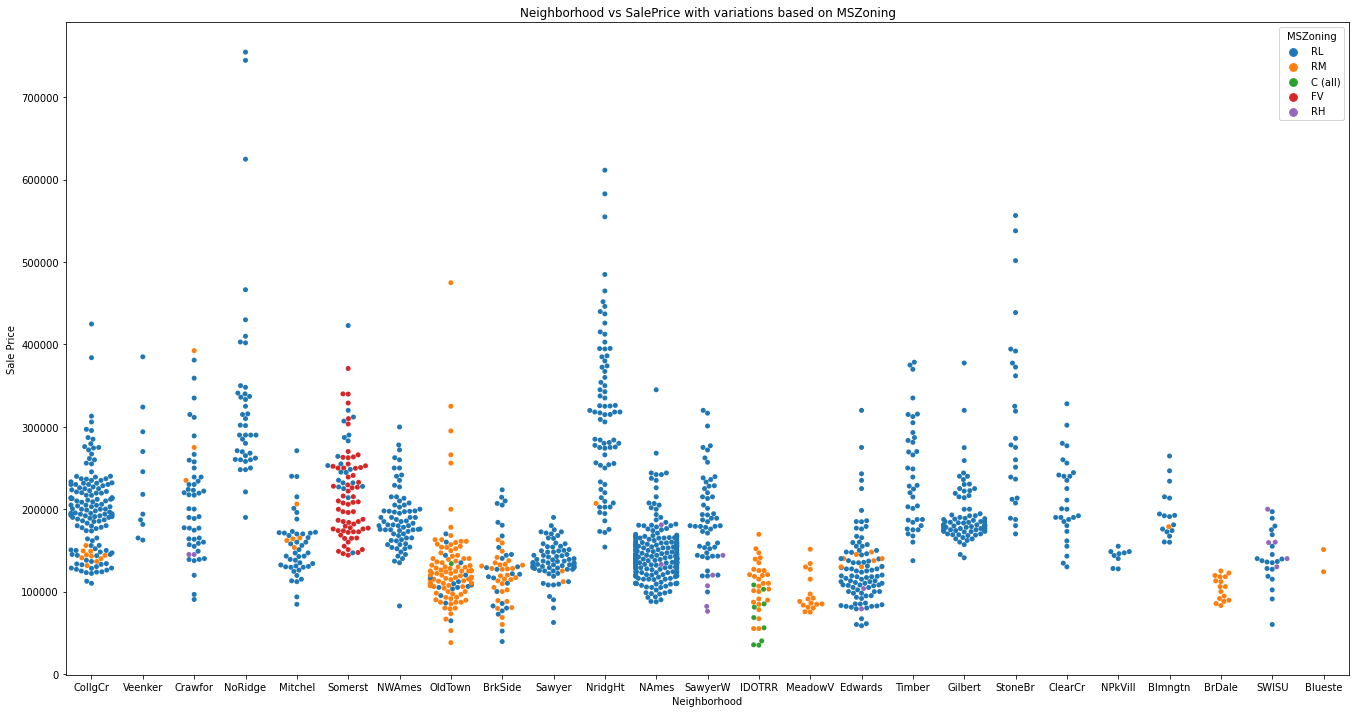

In [34]:
# Swarm Plot of Neighborhood vs SalePrice with variations based on MSZoning
plt.figure(figsize=(23,12))
sns.swarmplot(df_train['Neighborhood'], y, hue=df_train['MSZoning'])
plt.title("Neighborhood vs SalePrice with variations based on MSZoning")
plt.xlabel("Neighborhood")
plt.ylabel("Sale Price")
plt.show()

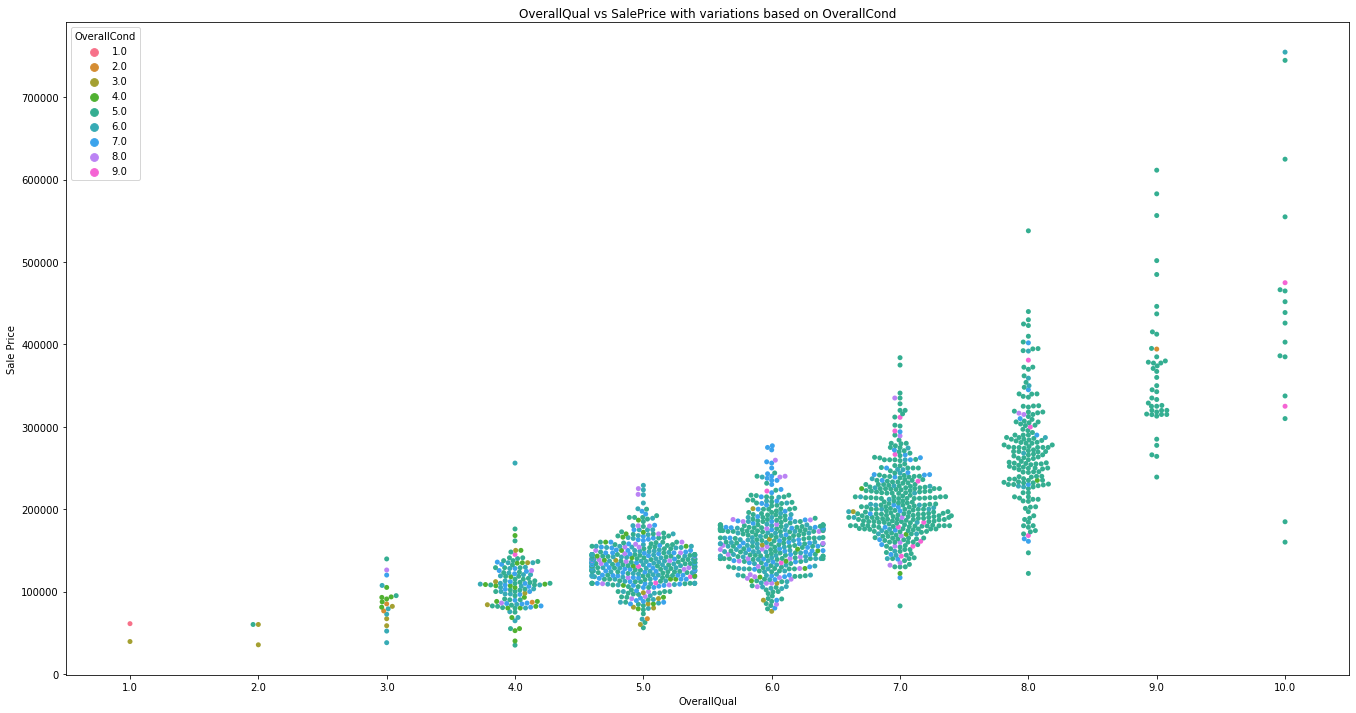

In [35]:
# Swarm Plot of OverallQual vs SalePrice with variations based on OverallCond
plt.figure(figsize=(23,12))
sns.swarmplot(df_train['OverallQual'], y, hue=df_train['OverallCond'], palette='husl')
plt.title("OverallQual vs SalePrice with variations based on OverallCond")
plt.xlabel("OverallQual")
plt.ylabel("Sale Price")
plt.show()

In [22]:
df_train['train']=1
df_test['train']=0

In [23]:
df=pd.concat([df_train , df_test] , axis=0 , sort=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 75 columns):
MSSubClass       2919 non-null float64
MSZoning         2919 non-null object
LotFrontage      2919 non-null float64
LotArea          2919 non-null float64
Street           2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null float64
OverallCond      2919 non-null float64
YearBuilt        2919 non-null float64
YearRemodAdd     2919 non-null float64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 non-null object
MasVnrType  

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le={}
for col in ordinal_columns:
    le[col]=LabelEncoder()
    df[col]=le[col].fit_transform(df[col])


In [26]:
df[ordinal_columns]

,Street,LotShape,LandContour,Utilities,LandSlope,BldgType,HouseStyle,ExterQual,ExterCond,BsmtQual,...,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,Functional,GarageFinish,GarageQual,GarageCond,PavedDrive
Id,,,,,,,,,,,,,,,,,,,,,
1,1,3,3,0,0,0,5,2,4,2,...,2,5,0,1,2,6,1,4,4,2
2,1,3,3,0,0,0,2,3,4,2,...,0,5,0,1,3,6,1,4,4,2
3,1,0,3,0,0,0,5,2,4,2,...,2,5,0,1,2,6,1,4,4,2
4,1,0,3,0,0,0,5,3,4,3,...,0,5,2,1,2,6,2,4,4,2
5,1,0,3,0,0,0,5,2,4,2,...,2,5,0,1,2,6,1,4,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,1,3,3,0,0,3,5,3,4,3,...,5,5,2,1,3,6,2,4,4,2
2916,1,3,3,0,0,4,5,3,4,3,...,4,5,4,1,3,6,2,4,4,2
2917,1,3,3,0,0,0,2,3,4,3,...,0,5,0,1,3,6,2,4,4,2


In [27]:
df2=pd.get_dummies(df)

In [28]:
df_train=df2[df2['train'] > 0.5]

In [29]:
df_test=df2[df2['train'] < 0.5]

In [30]:
#from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()
#df_train[num_col]=sc.fit_transform(df_train[num_col])
#df_test[num_col]=sc.fit_transform(df_test[num_col])

In [31]:
from sklearn.model_selection import train_test_split
xtr,xte,ytr,yte= train_test_split(df_train , y, test_size=0.2 , random_state=10)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
lr=LinearRegression()
lr.fit(xtr , ytr)
y_pred=lr.predict(xte)
print(mean_squared_error(y_pred,yte))
print(r2_score(y_pred,yte))

760989166.3303787
0.8762529609713728


In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
lr=RandomForestRegressor(n_estimators=500)
lr.fit(xtr , ytr)
y_pred=lr.predict(xte)
print(mean_squared_error(y_pred,yte))
print(r2_score(y_pred,yte))
pred=lr.predict(df_test)
sub_df = pd.DataFrame({'Id': df_test2['Id'], 'SalePrice': pred})
sub_df.to_csv('submit31.csv', index=False)

795011752.7866439
0.825489248882521


In [34]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score
lr=KNeighborsRegressor(n_neighbors=5)
lr.fit(xtr , ytr)
y_pred=lr.predict(xte)
print(mean_squared_error(y_pred,yte))
print(r2_score(y_pred,yte))
pred=lr.predict(df_test)
sub_df = pd.DataFrame({'Id': df_test2['Id'], 'SalePrice': pred})
sub_df.to_csv('submit32.csv', index=False)

1895353994.7791781
0.42034043488991446


In [35]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score
lr=XGBRegressor()
lr.fit(xtr , ytr)
y_pred=lr.predict(xte)
print(mean_squared_error(y_pred,yte))
print(r2_score(y_pred,yte))

595536839.8523388
0.882380123742554


In [36]:
pred=lr.predict(df_test)
sub_df = pd.DataFrame({'Id': df_test2['Id'], 'SalePrice': pred})
sub_df.to_csv('submit33.csv', index=False)

In [37]:
# now with feature selection:

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA(n_components=20)
#xtr=lda.fit_transform(xtr,ytr)

In [39]:
xtr.shape

(1168, 198)